<a href="https://colab.research.google.com/github/allakoala/data_science/blob/main/colab_notebooks/Regression_(advanced)_Homework_without_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset
HW https://colab.research.google.com/drive/1hsEPlSahUfocQKCCmX2uRRCaDuiK1Soz

Data https://drive.google.com/file/d/1p4azCzZlFR5KZNVa4bG-LrZZtx0lPds1/view

Details https://drive.google.com/file/d/1CmF-dWNuOudFDgvPBZMVdJ-JzOIPoAGe/view

Dataset is about bike rental service. It contains bike sharing counts aggregated on hourly basis. Total number of records: 17379 hours (2 years of rental services). There are following features:
- instant: record index
- dteday : date of record
- hr : hour (0 to 23) of record
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- holiday : whether day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : weather situation in the current timeframe
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users (target 1)
- registered: count of registered users (target 2)
- cnt: count of total rental bikes including both casual and registered (target total)

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
#path of the file to read
url = "/content/drive/MyDrive/Colab Notebooks/data/regression advanced/hour.csv"

#read the file into a variable
data = pd.read_csv(url, sep=',')

#examine the data
print(data.head())
print(data.info())
#for each dataset column print unique values
for col in data.columns:
    n_unique_values = data[col].nunique()
    unique_values = data[col].unique()
    print(f"{col}: {n_unique_values}: {unique_values}")

#missing data for each variable and way to handle it. missing data can imply a reduction of the sample size
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Tota_null', 'Percent_null'])
missing_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0

,Tota_null,Percent_null
instant,0,0.0
weathersit,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
workingday,0,0.0
dteday,0,0.0


## The X-axis is the hour and Y-axis is the count of the bike. On weekdays, we observe a peak in the morning hours and in the evening. On weekends, the peak value is in the afternoon. The most overloaded monthes are starting from 5th till 10th.

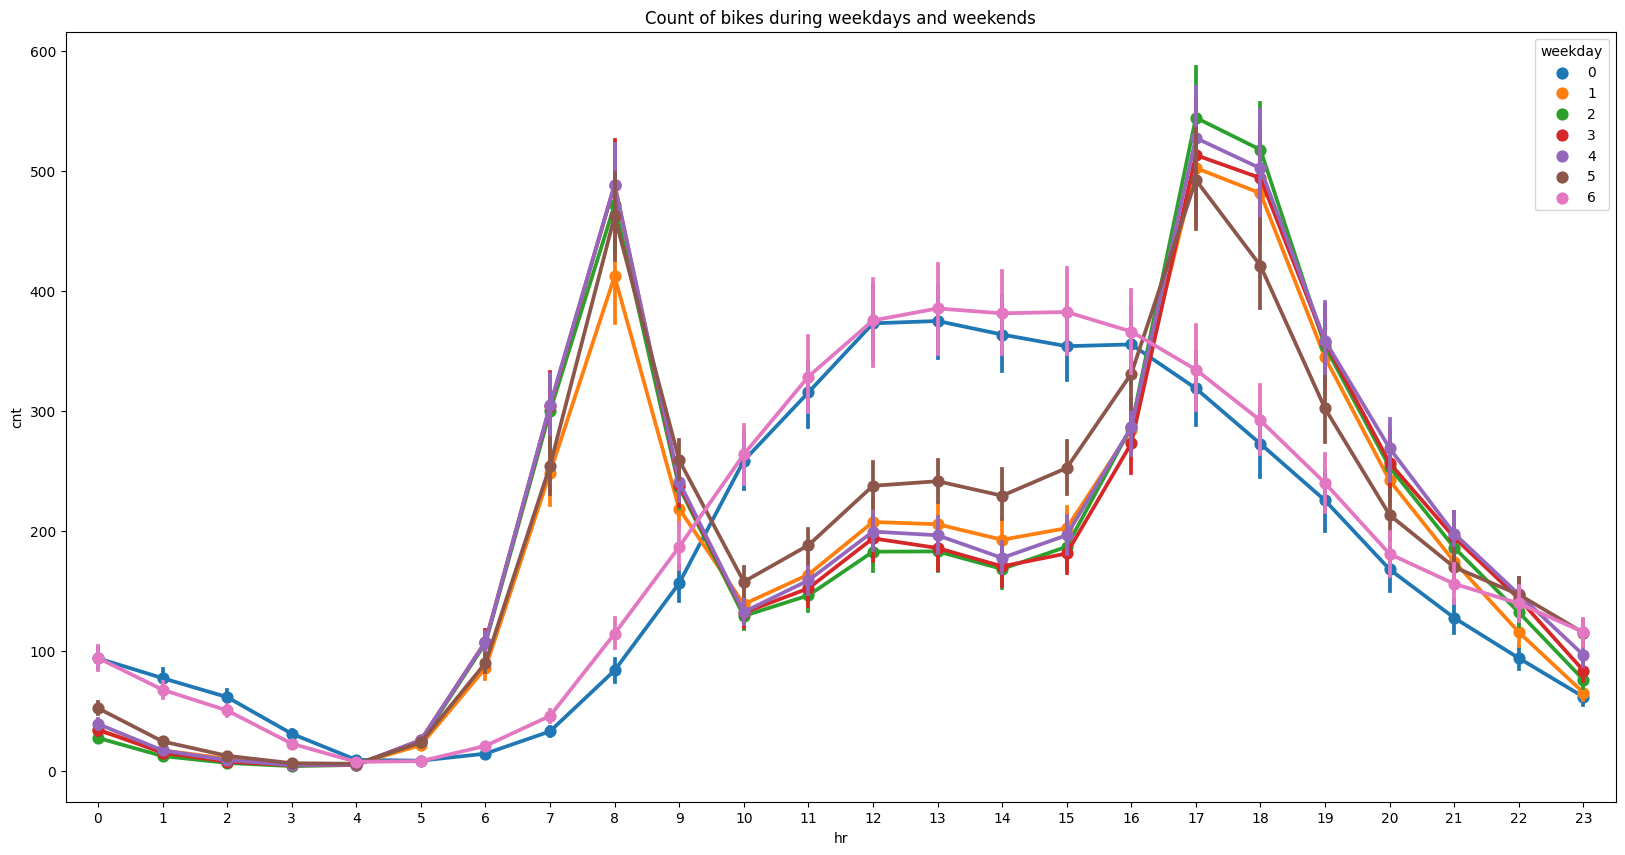

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=data, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')

plt.show()

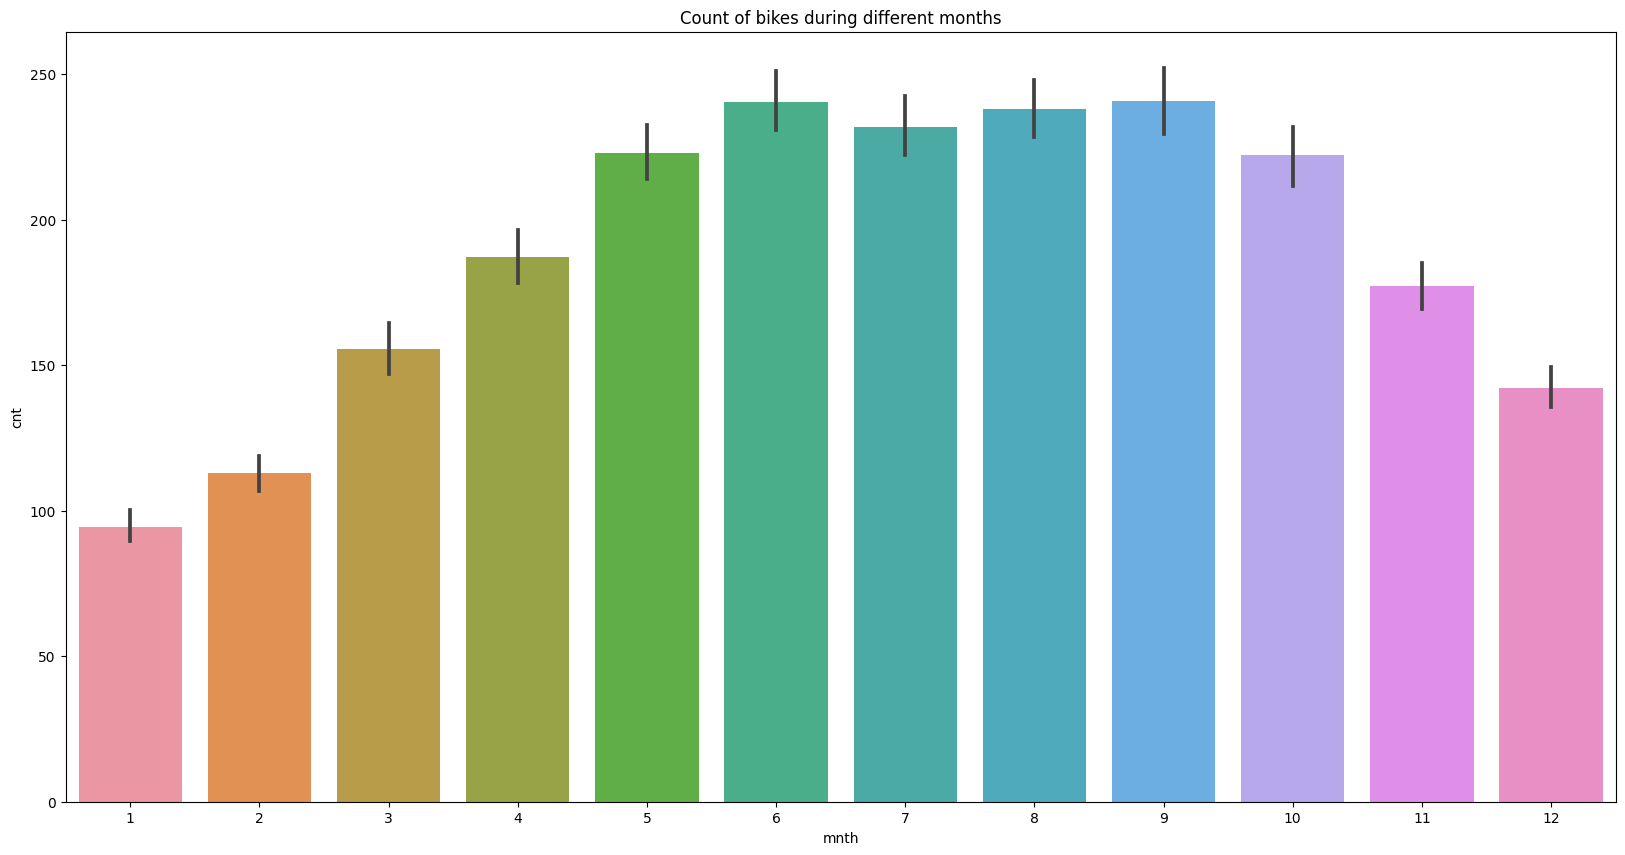

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

plt.show()

## With the increase in temperature, the number of user increases.When the humidity increases the number of users decreases.

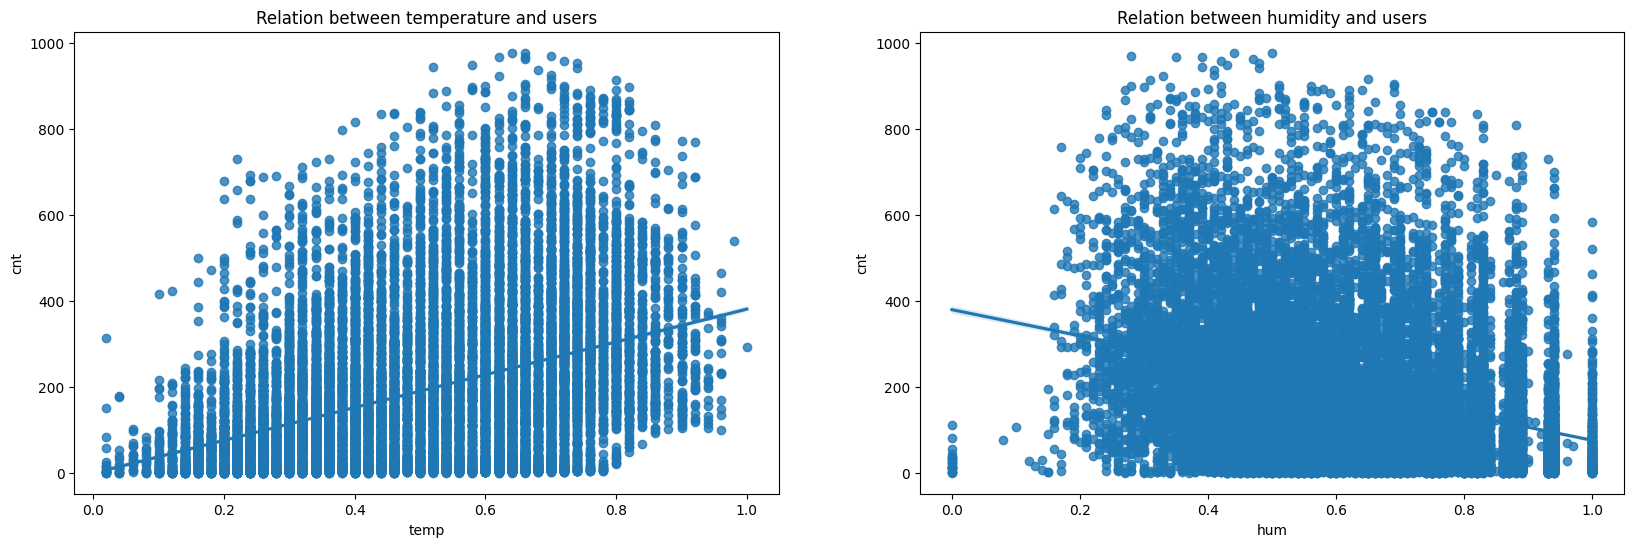

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
sns.regplot(x=data['temp'], y=data['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")

sns.regplot(x=data['hum'], y=data['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

plt.show()

## We can see a huge numerical difference in the distribution of the users, so the data is not equally distributed. Most of the data are in zero in the theoretical quantiles, so we must convert the data to approximate as much as possible as the red line

<ipython-input-210-60a067593b55>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cnt'], ax=ax1)


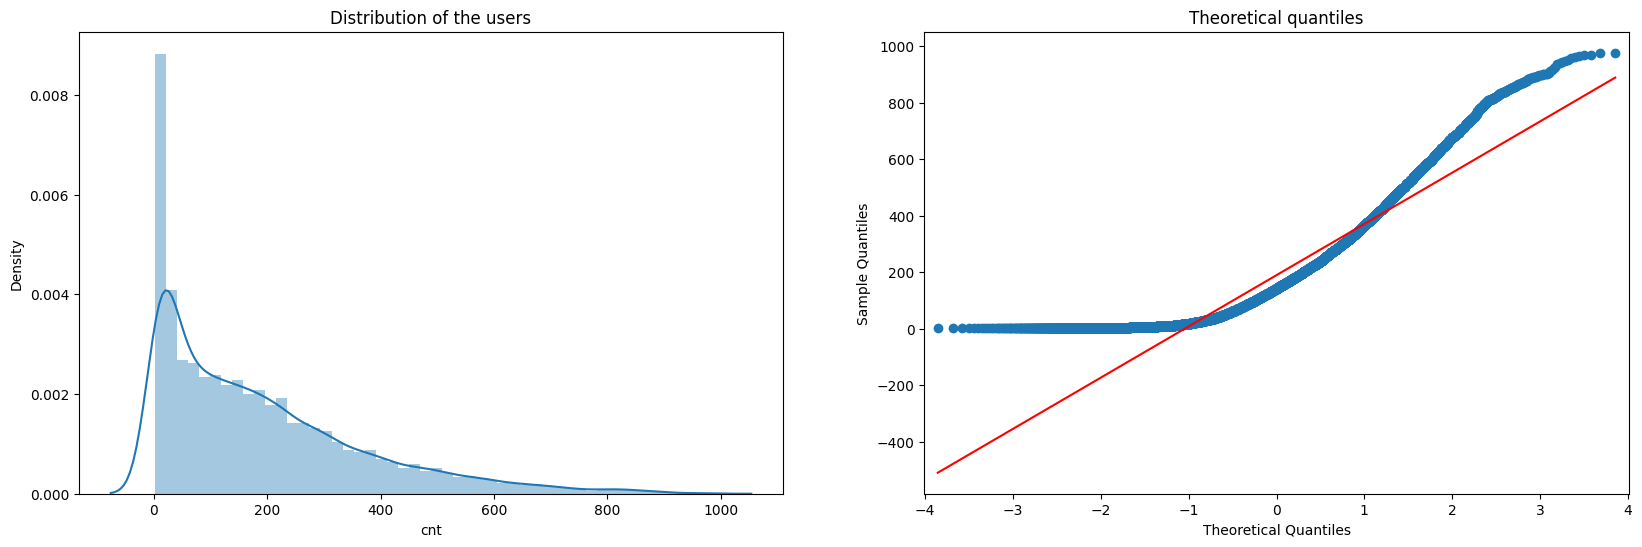

In [ ]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
sns.distplot(data['cnt'], ax=ax1)
ax1.set(title='Distribution of the users')

qqplot(data['cnt'], ax=ax2, line='s')
ax2.set(title='Theoretical quantiles')

plt.show()

## Log transformation application to uniform the data
1. Now the distribution is more uniform, meaning the data was converted accordingly

2. Now the data in the theoretical quantiles is very similar to the red line

3. You may use MIN-MAX normalization or Standardization to see different results

<ipython-input-211-92cf7d094237>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cnt'], ax=ax1)


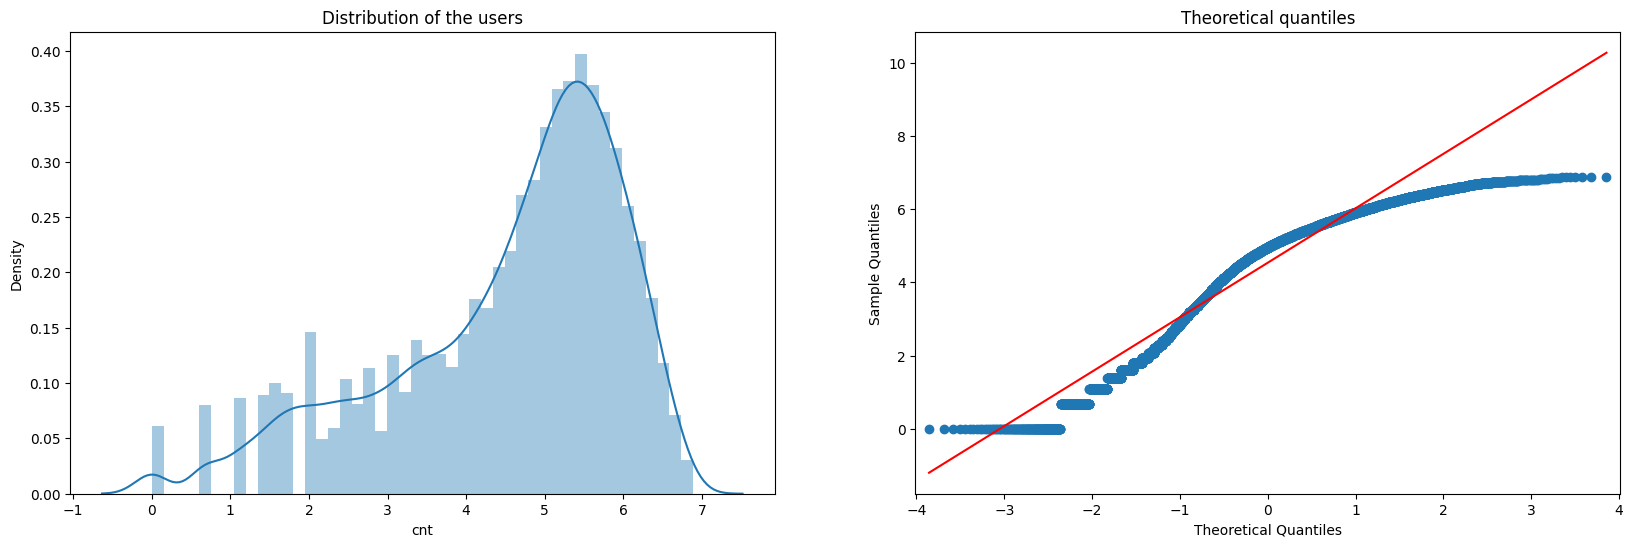

In [ ]:
df = pd.DataFrame(data)

df['cnt'] = np.log(df['cnt'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
sns.distplot(df['cnt'], ax=ax1)
ax1.set(title='Distribution of the users')

qqplot(df['cnt'], ax=ax2, line='s')
ax2.set(title='Theoretical quantiles')

plt.show()

# Task

- Preprocessing (1 point) https://www.kaggle.com/code/lakshmi25npathi/bike-rental-count-prediction-using-python

- Feature engineering (2 points)
- Use different advanced regression algorithms:
    - KNN Regressor (1 point)
    - Decision Tree Regressor (1 point)
    - Random Forest / Extra Trees Regressor (1 point)
    - SVM Regressor (1 point)
    - Boosting Regressor - any Boosting algorithm with Regression (1 point)
    - Any other regression algorithm besides Linear, Ridge, Lasso and used above. (1 point)

NB! The task is considered done for each model if there is hyperparameters tuning and validation is used.
- Build regression model for each year in question (2 points):
    - Target is cnt, exclude casual and registered from the model
    - Validate either on last 7 days of each months or on random subsample
    - Check the quality of prediction
    - Build regression model based on the first year data and make predictions for the second year (you should validate first year model on itself, similarly to previous task) . The results are better or worse? Why? (1 point)
- Build regression model for each year in question (2 points):
    - Multitarget: casual and registered, exclude cnt from the model
    - Validate either on last 7 days of each months or on random subsample
    - Check the quality of prediction
    - Use the sum of two targets two predict cnt. Estimate the quality. Is it higher than for one-target model? (1 point)
- In the process of completion, answer the following questions:
    - How the temperature and humidity influences rental count rates? What is more important - temperature or feeling temperature? (2 point)
    - What are the most influentual features? (2 points)
    - What is more important: current season or current hour? (1 point)

Total points: 20. Threshold for completion: 15 points.

In [ ]:
# Preprocessing
# Outliers detection - iqr, isolation forest, dbscan
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Define the numerical features
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, feature):
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data[feature] < lower_bound) | (data[feature] > upper_bound)

# Function to detect outliers using Isolation Forest method
def detect_outliers_isolation_forest(data, feature):
    clf = IsolationForest(random_state=0)
    clf.fit(data[feature].values.reshape(-1, 1))
    return clf.predict(data[feature].values.reshape(-1, 1)) == -1

# Function to detect outliers using DBSCAN method
def detect_outliers_dbscan(data, feature):
    dbscan = DBSCAN(eps=0.3, min_samples=5)
    return dbscan.fit_predict(data[feature].values.reshape(-1, 1)) == -1

# Function to impute outliers with median value
def impute_outliers(data, feature):
    median = np.median(data[~detect_outliers_iqr(data, feature)][feature])
    data.loc[detect_outliers_iqr(data, feature), feature] = median

# Perform outlier detection and imputation for each feature
for feature in numerical_features:
    # Detect outliers using IQR method
    iqr_outliers = detect_outliers_iqr(data, feature)
    num_iqr_outliers = iqr_outliers.sum()
    print("Number of outliers detected (IQR) for {}: {}".format(feature, num_iqr_outliers))

    # Detect outliers using Isolation Forest method
    isolation_forest_outliers = detect_outliers_isolation_forest(data, feature)
    num_isolation_forest_outliers = isolation_forest_outliers.sum()
    print("Number of outliers detected (Isolation Forest) for {}: {}".format(feature, num_isolation_forest_outliers))

    # Detect outliers using DBSCAN method
    dbscan_outliers = detect_outliers_dbscan(data, feature)
    num_dbscan_outliers = dbscan_outliers.sum()
    print("Number of outliers detected (DBSCAN) for {}: {}".format(feature, num_dbscan_outliers))

    # Impute outliers with median value
    impute_outliers(data, feature)

# Print the updated dataset
print("Updated Dataset:")
print(data)

# aggregation - weekday-month, hour-weekday
# Option 1: Aggregation by weekday-month, Option 2: Aggregation by hour-weekday
aggregation_option_1 = 'weekday-month'
aggregation_option_2 = 'hour-weekday'

# Perform aggregation based on option 1: weekday-month
if aggregation_option_1 == 'weekday-month':
    aggregated_data_option_1 = data.groupby(['weekday', 'mnth']).agg({'temp': 'mean', 'atemp': 'mean', 'hum': 'mean', 'windspeed': 'mean'})
elif aggregation_option_1 == 'hour-weekday':
    aggregated_data_option_1 = data.groupby(['hr', 'weekday']).agg({'temp': 'mean', 'atemp': 'mean', 'hum': 'mean', 'windspeed': 'mean'})

# Perform aggregation based on option 2: hour-weekday
if aggregation_option_2 == 'weekday-month':
    aggregated_data_option_2 = data.groupby(['weekday', 'mnth']).agg({'temp': 'median', 'atemp': 'median', 'hum': 'median', 'windspeed': 'median'})
elif aggregation_option_2 == 'hour-weekday':
    aggregated_data_option_2 = data.groupby(['hr', 'weekday']).agg({'temp': 'median', 'atemp': 'median', 'hum': 'median', 'windspeed': 'median'})

# Print the aggregated data
print("Aggregated Data (Option 1: {} - Method: Average)".format(aggregation_option_1))
print(aggregated_data_option_1)
print()
print("Aggregated Data (Option 2: {} - Method: Median)".format(aggregation_option_2))
print(aggregated_data_option_2)

# devide features into num and categirical
# Drop unnecessary columns
columns_to_drop = ['instant', 'dteday']
data = data.drop(columns_to_drop, axis=1)

categorical_features = [col for col in data.columns if col not in numerical_features]
categorical_features_merge_1 = [col for col in categorical_features if col not in aggregated_data_option_1.columns]
categorical_features_merge_2 = [col for col in categorical_features if col not in aggregated_data_option_2.columns]

print("Numerical features:", numerical_features)
print("Categorical features for Aggregated Data (Option 1: weekday-month - Method: Average) :", categorical_features_merge_1)
print("Categorical features for Aggregated Data (Option 2: hour-weekday - Method: Median) :", categorical_features_merge_2)

#merge
# aggregated_data_1 with data[categorical_features_merge_1]
merged_data_1 = pd.merge(data[categorical_features_merge_1], aggregated_data_option_1, on='index', how='left')

# categorical features for the new dataframe
categorical_features_new_1 = [col for col in merged_data_1.columns if col not in numerical_features]

# Print the categorical features
print("Categorical features for the merged dataframe:")
print(categorical_features_new_1)

# aggregated_data_1 with data[categorical_features_merge_2]
merged_data_2 = pd.merge(data[categorical_features_merge_2], aggregated_data_option_2, on='index', how='left')

# categorical features for the new dataframe
categorical_features_new_2 = [col for col in merged_data_2.columns if col not in numerical_features]

# Print the categorical features
print("Categorical features for the merged dataframe:")
print(categorical_features_new_2)

Number of outliers detected (IQR) for temp: 0
Number of outliers detected (Isolation Forest) for temp: 5743
Number of outliers detected (DBSCAN) for temp: 0
Number of outliers detected (IQR) for atemp: 0
Number of outliers detected (Isolation Forest) for atemp: 6430
Number of outliers detected (DBSCAN) for atemp: 0
Number of outliers detected (IQR) for hum: 22
Number of outliers detected (Isolation Forest) for hum: 6167
Number of outliers detected (DBSCAN) for hum: 0
Number of outliers detected (IQR) for windspeed: 342
Number of outliers detected (Isolation Forest) for windspeed: 6008
Number of outliers detected (DBSCAN) for windspeed: 0
Updated Dataset:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0

KeyError: ignored

In [ ]:
# Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = data.drop('cnt', axis=1)
y = data['cnt']

# Apply square transformation to the data
square_data = X.apply(np.square)
square_data.columns = ['sq_' + col for col in square_data.columns]

# Apply cube transformation to the data
cube_data = np.power(X, 3)
cube_data.columns = ['cube_' + col for col in cube_data.columns]

# Apply square root transformation to the data
sqrt_data = X.apply(np.sqrt)
sqrt_data.columns = ['sqrt_' + col for col in sqrt_data.columns]

# Apply log transformation to the data
log_data = X.apply(np.log)
log_data.columns = ['log_' + col for col in log_data.columns]

# Concatenate the original data with the transformed data
X_t = pd.concat([X, square_data, cube_data, sqrt_data, log_data], axis=1)

# Display the first 15 rows of the transformed data
print(X_t.head(15))

In [ ]:
total = X_t.isin([np.inf, -np.inf]).sum().sort_values(ascending=False)
percent = (X_t.isin([np.inf, -np.inf]).sum() / X_t.shape[0]).sort_values(ascending=False)
inf_data = pd.concat([total, percent], axis=1, keys=['Total_Infinite', 'Percent_Infinite'])
inf_data

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

# Define the models and their respective parameter grids for grid search
models = {
    'KNN': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'p': [1, 2]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 20]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}),
    'Extra Trees': (ExtraTreesRegressor(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}),
    'SVM': (SVR(), {'C': [1, 10, 100], 'epsilon': [0.1, 0.01, 0.001]}),
    'Gradient Boosting': (GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001]})
    # Add more models and their parameter grids as needed
}

# Perform grid search with cross-validation for each model
results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'Best Hyperparameters': grid_search.best_params_,
        'Best MSE': mse,
        'Best R^2': r2
    }

# Print the results for each model
for model_name, result in results.items():
    print(model_name)
    print("Best Hyperparameters:", result['Best Hyperparameters'])
    print("Best MSE:", result['Best MSE'])
    print("Best R^2:", result['Best R^2'])
    print()